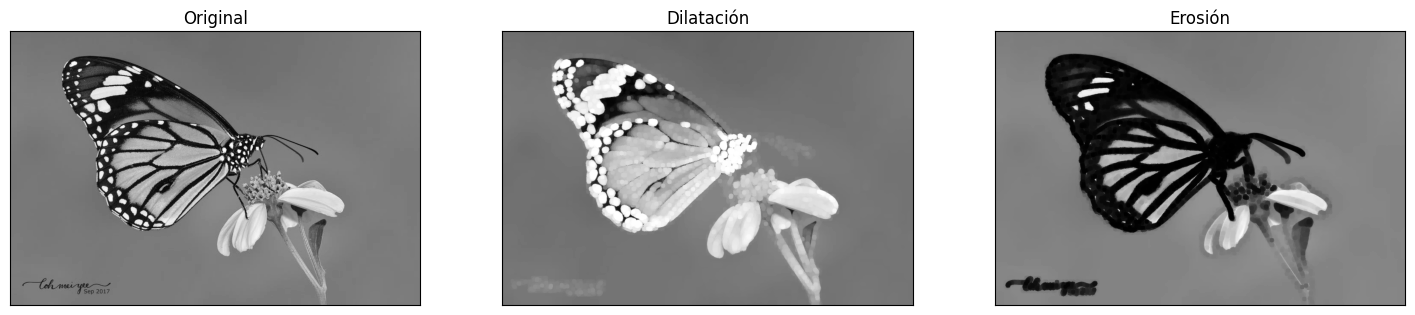

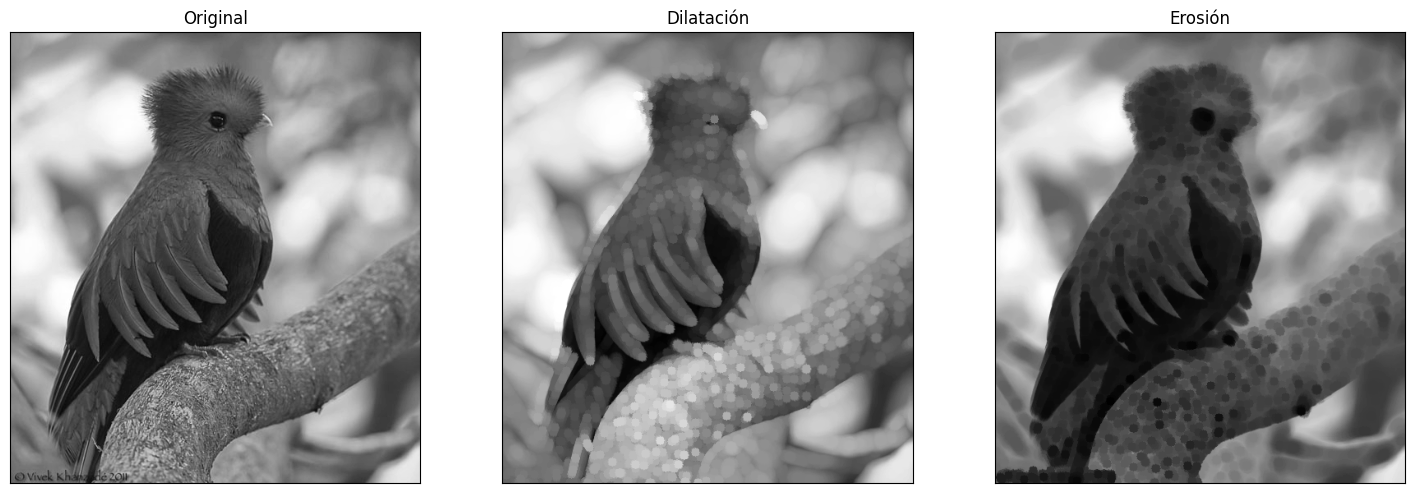

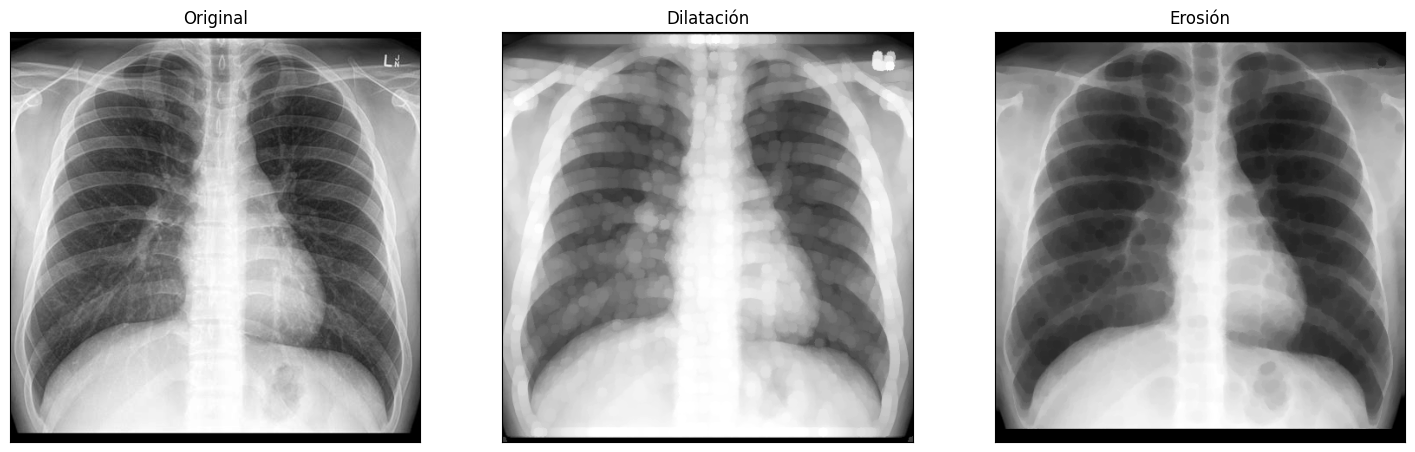

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import morphology as mo
import skimage as ski

# Nombres de archivos de las imágenes
imagenes = ['./imgs/butterfly.jpeg', './imgs/quetzalgris.png', './imgs/chestXray.jpeg']

# Elemento estructurante para operaciones morfológicas
kernel = mo.disk(5)

for imagen in imagenes:

    I = plt.imread(imagen)

    try:
        I = ski.color.rgb2gray(I)
    except:
        I = ski.color.rgba2rgb(I)
        I = ski.color.rgb2gray(I)

    gray = I
    dilation = mo.dilation(gray, kernel)
    erosion = mo.erosion(gray, kernel)

    # Visualización de las imágenes
    titles = ['Original', 'Dilatación', 'Erosión']
    images = [gray, dilation, erosion]
    
    plt.figure(figsize=(18, 12))
    for i in range(3):
        plt.subplot(1, 3, i+1), plt.imshow(images[i], 'gray')
        plt.title(titles[i])
        plt.xticks([]), plt.yticks([])
    plt.show()


## Efecto de Dilatación

La dilatación hace que los objetos blancos en la imagen se expandan, mientras que los espacios negros se contraen. Esto puede llevar a varios efectos visuales:
  
* Los bordes blancos de los objetos se vuelven más gruesos.  
* Las áreas blancas pequeñas se hacen más prominentes.  
* Los objetos blancos cercanos pueden unirse y convertirse en un solo objeto más grande.  
* Los detalles finos en áreas oscuras pueden perderse debido a la expansión de las áreas claras.


En las imágenes de la mariposa y el quetzal, puedes ver que los bordes de las alas y las plumas, respectivamente, se han expandido y los detalles más finos se han hecho menos nítidos. En la radiografía de tórax, las estructuras más claras, como los huesos y el contorno del corazón, parecen más grandes y menos definidas.  

## Efecto de Erosión
La erosión tiene el efecto opuesto a la dilatación:

* Los objetos blancos se encogen y los bordes se adelgazan.  
* Las pequeñas manchas blancas o ruido pueden desaparecer completamente.  
* Los objetos separados pueden volverse más distintos y separados entre sí.  
* Los detalles finos en áreas claras se vuelven más pronunciados.  


En las imágenes proporcionadas, la erosión ha hecho que las alas de la mariposa y las plumas del quetzal parezcan más delgadas y frágiles, con algunos de los detalles más pequeños posiblemente desapareciendo. Para la radiografía de tórax, la erosión ha reducido el grosor de las estructuras óseas y ha hecho que algunas de las características más sutiles sean más evidentes, aunque también más delgadas y potencialmente discontinuas.

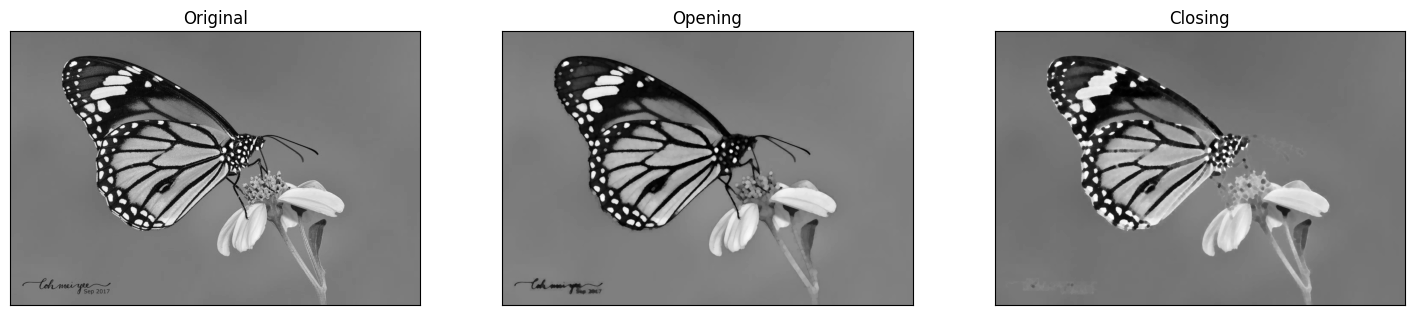

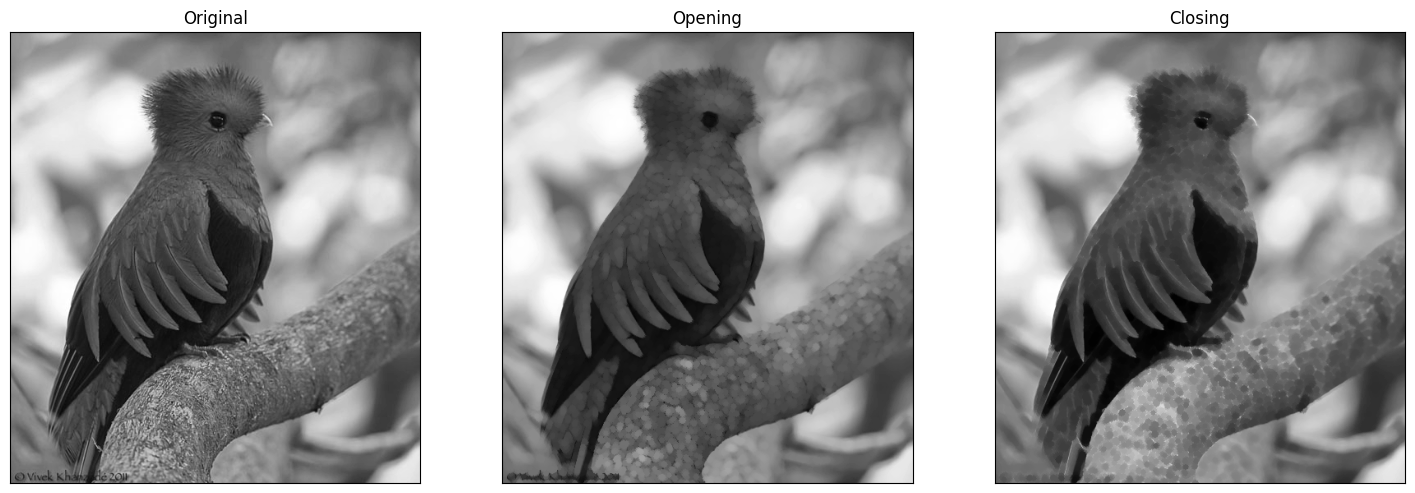

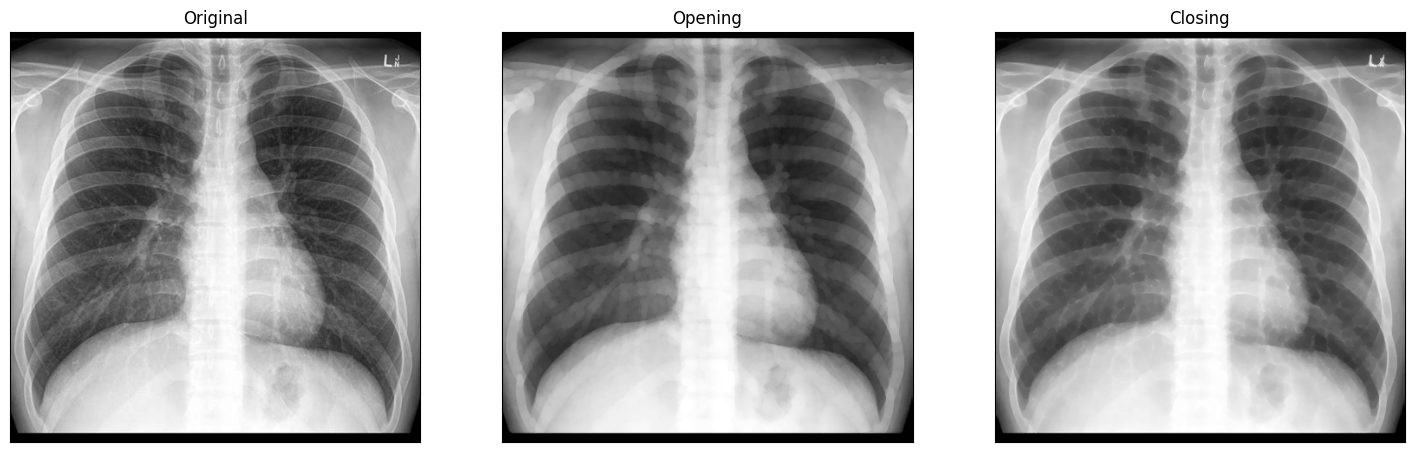

In [6]:
    
# Elemento estructurante para operaciones morfológicas
kernel = mo.disk(3)

for imagen in imagenes:

    I = plt.imread(imagen)

    try:
        I = ski.color.rgb2gray(I)
    except:
        I = ski.color.rgba2rgb(I)
        I = ski.color.rgb2gray(I)

    gray = I
    opening = mo.opening(gray, kernel)
    closing = mo.closing(gray, kernel)

    # Visualización de las imágenes
    titles = ['Original', 'Opening', 'Closing']
    images = [gray, opening, closing]
    
    plt.figure(figsize=(18, 12))
    for i in range(3):
        plt.subplot(1, 3, i+1), plt.imshow(images[i], 'gray')
        plt.title(titles[i])
        plt.xticks([]), plt.yticks([])
    plt.show()


## Efecto de Apertura (Opening)
La apertura es una operación que combina una erosión seguida de una dilatación. Se utiliza para eliminar el ruido blanco de las imágenes. La apertura puede eliminar el ruido blanco mientras se conservan los objetos más grandes en la imagen.

* La operación de opening generalmente suaviza los contornos de los objetos, rompe estrechamente los objetos conectados y elimina protuberancias y puentes delgados.  
* En la imagen de la mariposa y el quetzal, se puede observar que los pequeños detalles y ruidos (como manchas o puntos aislados) han sido eliminados o reducidos. El contorno general de la mariposa y las plumas del quetzal parece más suave y uniforme.
* En la radiografía de tórax, la apertura ha reducido la visibilidad de las estructuras finas y ha suavizado las transiciones entre las áreas de densidad de tejido variable, lo que podría ser útil para enfocarse en características más grandes y omitir detalles más pequeños.


## Efecto de Cierre (Closing)

El cierre es una operación que combina una dilatación seguida de una erosión. Se utiliza para cerrar pequeños agujeros en los objetos y para unir objetos pequeños en un solo objeto más grande.

* El closing tiende a cerrar pequeños huecos y espacios dentro de los objetos y puede conectar objetos cercanos, lo que resulta en una apariencia más continua y uniforme.
* En la imagen de la mariposa y el quetzal, se observa que las áreas oscuras pequeñas dentro de los objetos más claros han sido rellenadas, dando como resultado una apariencia más compacta y sólida de las alas y las plumas.
* Para la radiografía de tórax, los espacios oscuros entre las estructuras óseas parecen haberse reducido, lo que podría hacer que las zonas de interés parezcan más prominentes o incluso resaltar anormalidades al rellenar los espacios circundantes.

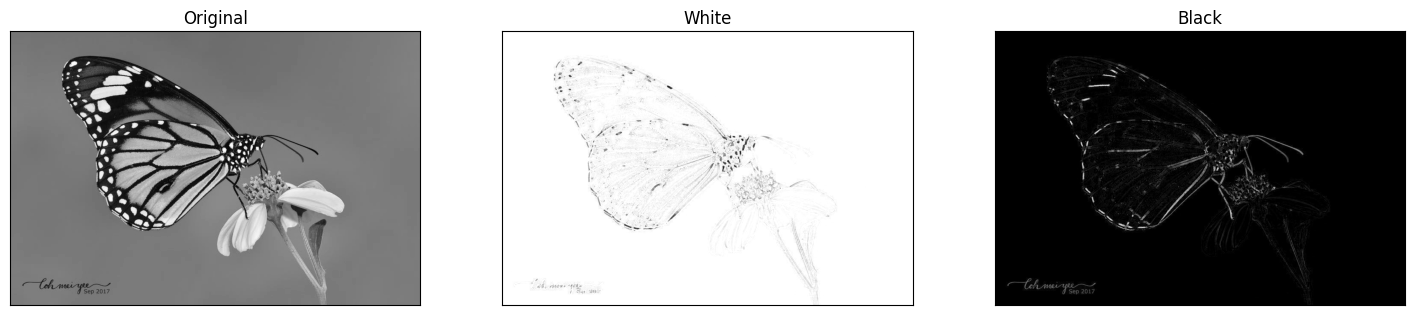

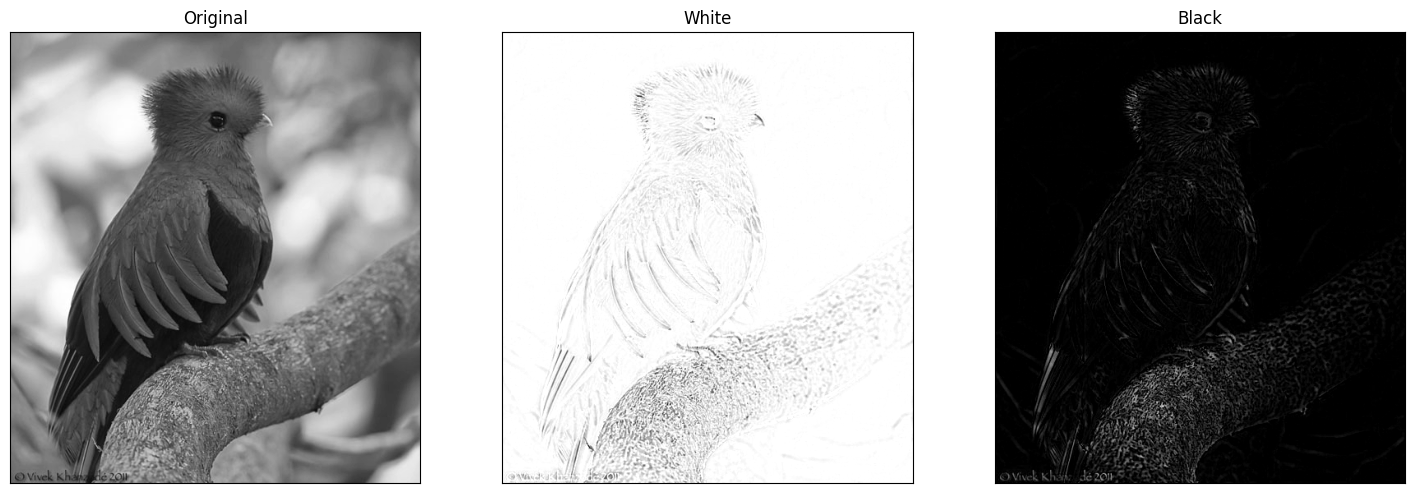

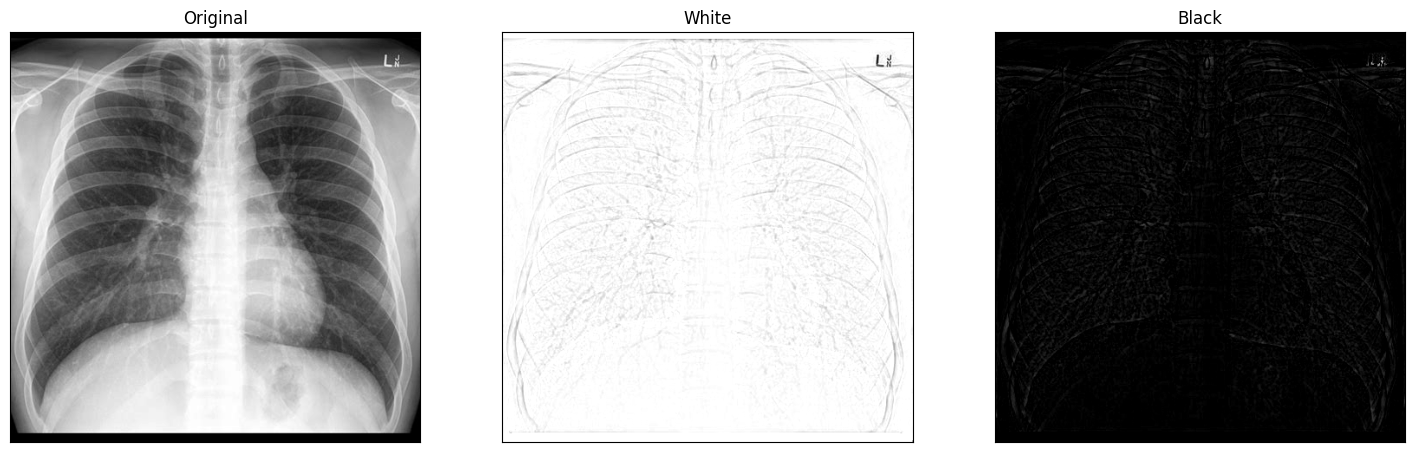

In [7]:
    
# Elemento estructurante para operaciones morfológicas
kernel = mo.disk(3)

for imagen in imagenes:

    I = plt.imread(imagen)

    try:
        I = ski.color.rgb2gray(I)
    except:
        I = ski.color.rgba2rgb(I)
        I = ski.color.rgb2gray(I)

    gray = I
    white_top_hat = mo.opening(gray, kernel) - gray
    black_top_hat = mo.closing(gray, kernel) - gray

    # Visualización de las imágenes
    titles = ['Original', 'White', 'Black']
    images = [gray, white_top_hat, black_top_hat]
    
    plt.figure(figsize=(18, 12))
    for i in range(3):
        plt.subplot(1, 3, i+1), plt.imshow(images[i], 'gray')
        plt.title(titles[i])
        plt.xticks([]), plt.yticks([])
    plt.show()


## ¿Qué hace el White Top-Hat?
El White Top-Hat, también conocido como transformación Top-Hat blanco, destaca elementos claros de la imagen que son más pequeños que el elemento estructurante. Técnicamente, esta operación resta la imagen después de un opening de la imagen original. El resultado es una imagen que muestra los elementos claros que han sido "cortados" por el opening. Estos elementos son usualmente detalles pequeños y finos que podrían no ser tan visibles en la imagen original debido al contraste con áreas cercanas más oscuras.

* En la imagen de la mariposa y el quetzal, el White Top-Hat resalta los bordes de las alas y las plumas, así como otros detalles finos que no son tan prominentes en la imagen original.
* En la radiografía de tórax, revela la textura fina y los detalles del tejido pulmonar que son más difíciles de discernir en la imagen original debido al contraste con los huesos y otras estructuras.